In [1]:
#import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [2]:
# allow multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# display all columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

#Plot Templates
plt.style.use('seaborn-dark-palette')
plt.rcParams['figure.figsize'] = (35, 35)

# Load Dataset

In [3]:
#Load the Dataset
import os

wd = os.getcwd()
print(wd)

C:\Users\Dims\Documents\MMA\831 - Marketing Analytics\Final Project


In [4]:
# Loading the dataframe
dataset = pd.read_csv (r'C:\Users\Dims\Documents\MMA\831 - Marketing Analytics\Final Project\bank-additional-full.csv')

# Exploring Data

In [5]:
dataset.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
dataset.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
#Get the list of objects in the dataset
objects= list(dataset.select_dtypes(include = ['object']).columns)
objects

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [8]:
dataset['job'].value_counts()
dataset['marital'].value_counts()
dataset['education'].value_counts()
dataset['default'].value_counts()
dataset['housing'].value_counts()
dataset['loan'].value_counts()
dataset['contact'].value_counts()
dataset['month'].value_counts()
dataset['day_of_week'].value_counts()
dataset['poutcome'].value_counts()
dataset['y'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

cellular     26144
telephone    15044
Name: contact, dtype: int64

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

no     36548
yes     4640
Name: y, dtype: int64

## Duplicates

In [9]:
# Getting the number of duplicated rows based on all the columns
dataset.duplicated().sum()

12

In [10]:
#Prining all the duplicates
dataset[dataset.duplicated(subset=None, keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [11]:
# Droping the duplicates by keeping the first instance only
dataset.drop_duplicates(subset=None, keep='first', inplace=True)

In [12]:
#Re-cheking the duplicates 
dataset.duplicated().sum()

0

## Missing Data

In [13]:
#check for missing values
missing = dataset.isna().sum().sort_values(ascending=False)
missing

y                 0
day_of_week       0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
duration          0
nr.employed       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
age               0
dtype: int64

## Spliting Dataset for Further Exploration

In [14]:
client = dataset[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]
client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [15]:
campaign = dataset[['contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']]
campaign.head()

,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,telephone,may,mon,261,1,999,0,nonexistent
1,telephone,may,mon,149,1,999,0,nonexistent
2,telephone,may,mon,226,1,999,0,nonexistent
3,telephone,may,mon,151,1,999,0,nonexistent
4,telephone,may,mon,307,1,999,0,nonexistent


In [16]:
econ = dataset[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
econ.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


### Client: Age

<AxesSubplot:xlabel='age', ylabel='count'>

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Age Count Distribution')

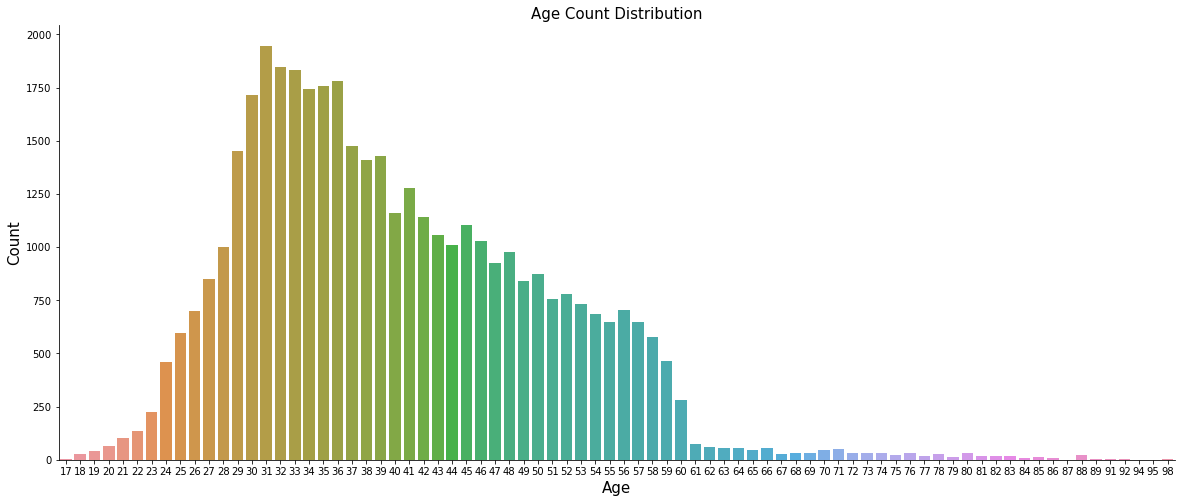

In [17]:
# Age Histogram
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=10)
sns.despine()

In [18]:
print('Min: ', client['age'].min())
print('Q1: ', client['age'].quantile(q = 0.25))
print('Mean: ', client['age'].mean())
print('Q3: ', client['age'].quantile(q = 0.75))
print('Max: ', client['age'].max())


Min:  17
Q1:  32.0
Mean:  40.02380027200311
Q3:  47.0
Max:  98


In [19]:
#Interquartile range for outlier calculation
age_iqr = client['age'].quantile(q = 0.75) - client['age'].quantile(q = 0.25)
age_iqr

15.0

In [20]:
#Mild outlier threshold
age_mild_outlier = client['age'].quantile(q = 0.75) + 1.5 * age_iqr
age_mild_outlier

69.5

In [21]:
#Extrime outlier threshold
age_extrime_outlier = client['age'].quantile(q = 0.75) + 3 * age_iqr
age_extrime_outlier

92.0

In [22]:
# Calculating outliers in numbers and %
age_mild_outlier_number = client[client['age'] > age_mild_outlier]['age'].count()
age_extreme_outlier_number = client[client['age'] > age_extrime_outlier]['age'].count()
total_observations = len(client)
age_mild_outlier_percent = round(age_mild_outlier_number/total_observations*100,2)
age_extreme_outlier_percent = round(age_extreme_outlier_number/total_observations*100,2)

print('Mild outliers: ', age_mild_outlier_number, ' or ', age_mild_outlier_percent ,'%')
print('Extreme outliers: ', age_extreme_outlier_number, ' or ', age_extreme_outlier_percent ,'%')
print('Number of clients: ', total_observations)

Mild outliers:  468  or  1.14 %
Extreme outliers:  4  or  0.01 %
Number of clients:  41176


In [23]:
#Feature Engineering - "Representation" | Clubbing multiple categories into one category
#Age was bucketed into the category 1, 2, 3 & 4.
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(dataset);

In [24]:
dataset.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,3,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,2,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,3,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,2,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,3,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,2,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,1,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,1,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Client: Job

<AxesSubplot:xlabel='job', ylabel='count'>

Text(0.5, 0, 'Job')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Job Count Distribution')

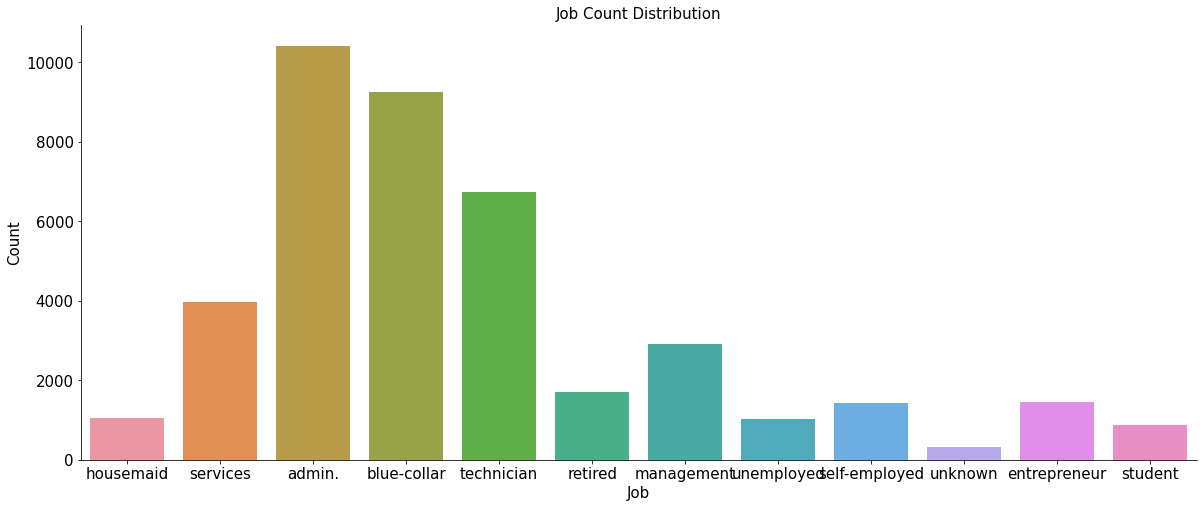

In [25]:
# Job Histogram
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Client: Marital

<AxesSubplot:xlabel='marital', ylabel='count'>

Text(0.5, 0, 'Marital')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Marital Count Distribution')

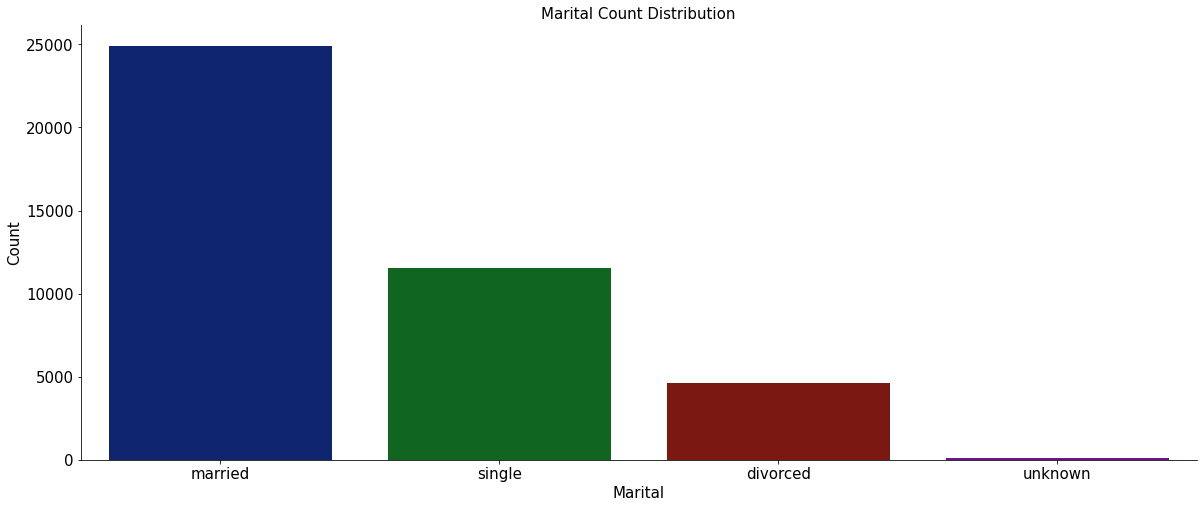

In [26]:
# Marital Histogram
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'marital', data = client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Client: Education

<AxesSubplot:xlabel='education', ylabel='count'>

Text(0.5, 0, 'Education')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Education Count Distribution')

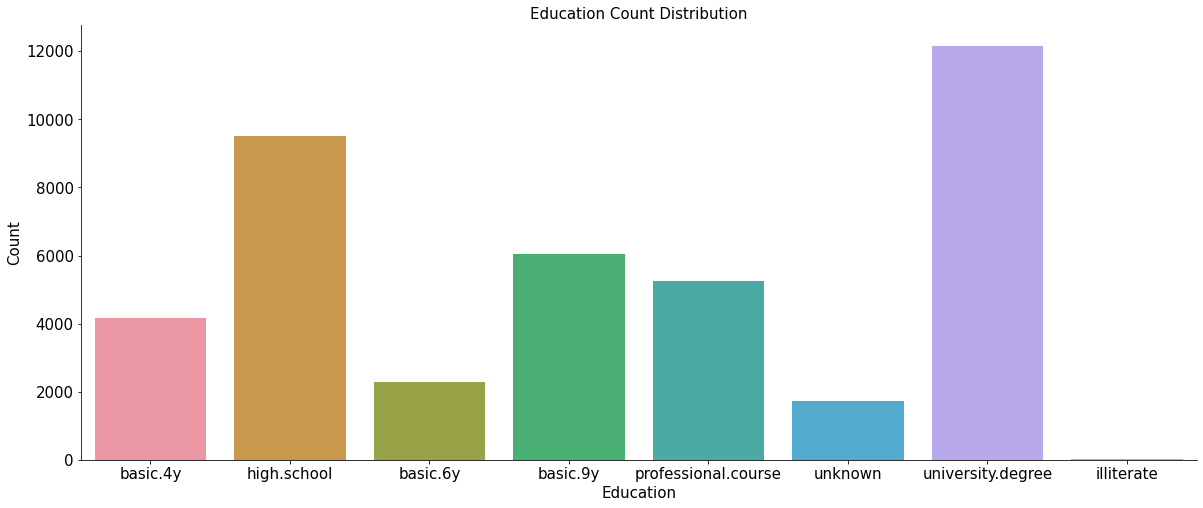

In [27]:
# Education Histogram
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'education', data = client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

In [28]:
print(dataset['education'].unique())


['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [29]:
#Feature Engineering - "Representation" | Clubbing multiple categories into one category
#basic.4y , basic.6y and basic.9y were combined into the category "Basic"
dataset['education']=np.where(dataset['education'] =='basic.9y', 'Basic', dataset['education'])
dataset['education']=np.where(dataset['education'] =='basic.6y', 'Basic', dataset['education'])
dataset['education']=np.where(dataset['education'] =='basic.4y', 'Basic', dataset['education'])

In [30]:
print(dataset['education'].unique())

['Basic' 'high.school' 'professional.course' 'unknown' 'university.degree'
 'illiterate']


### Client: Default

<AxesSubplot:xlabel='default', ylabel='count'>

Text(0.5, 0, 'Default')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Default Count Distribution')

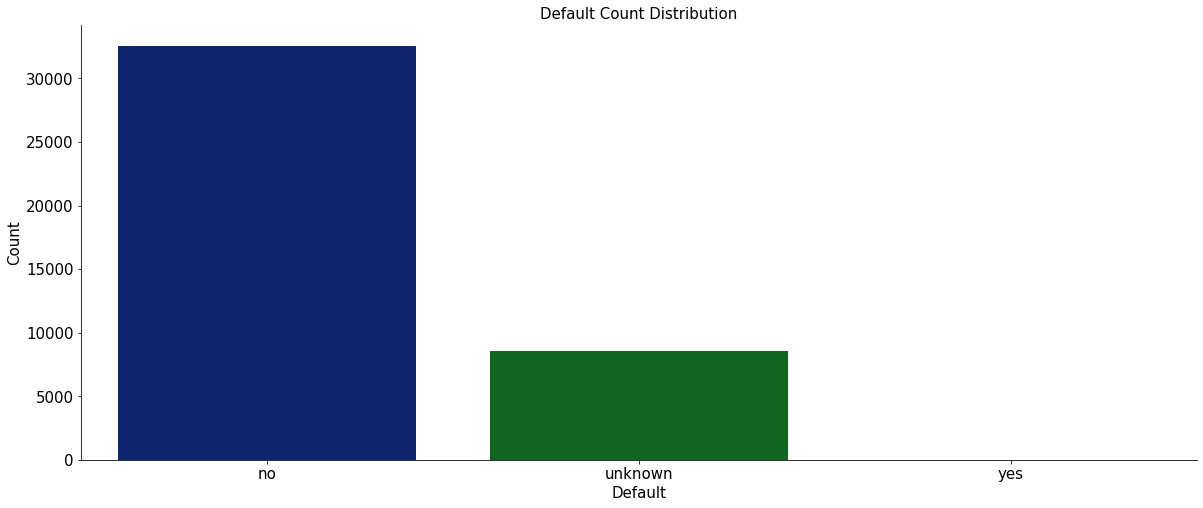

In [31]:
# Default Histogram
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'default', data = client)
ax.set_xlabel('Default', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Default Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Client: Housing

<AxesSubplot:xlabel='housing', ylabel='count'>

Text(0.5, 0, 'Housing')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Housing Count Distribution')

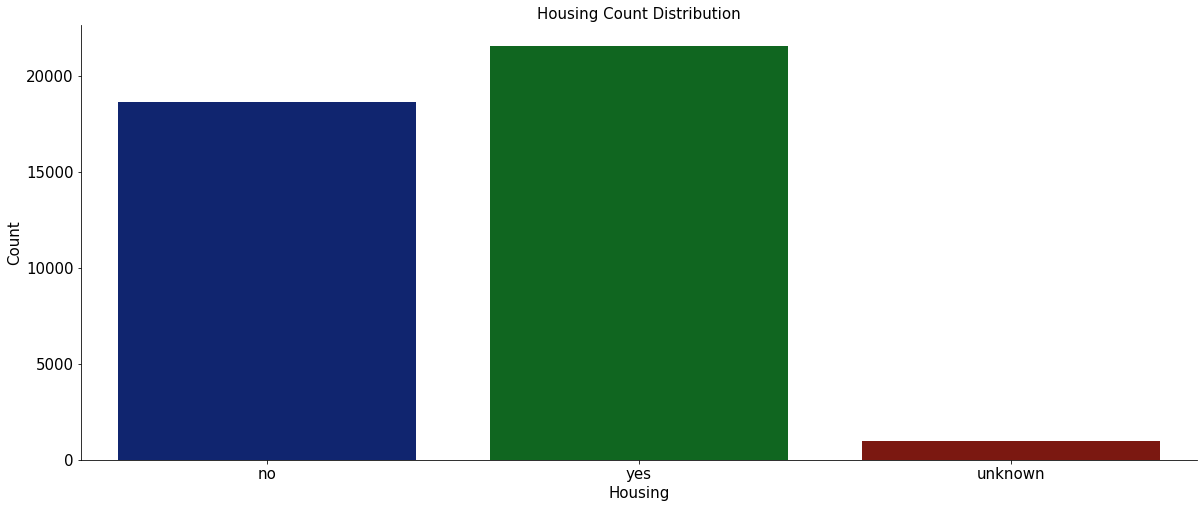

In [32]:
# Housing Histogram
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'housing', data = client)
ax.set_xlabel('Housing', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Housing Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Client: Loan

<AxesSubplot:xlabel='loan', ylabel='count'>

Text(0.5, 0, 'Loan')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Loan Count Distribution')

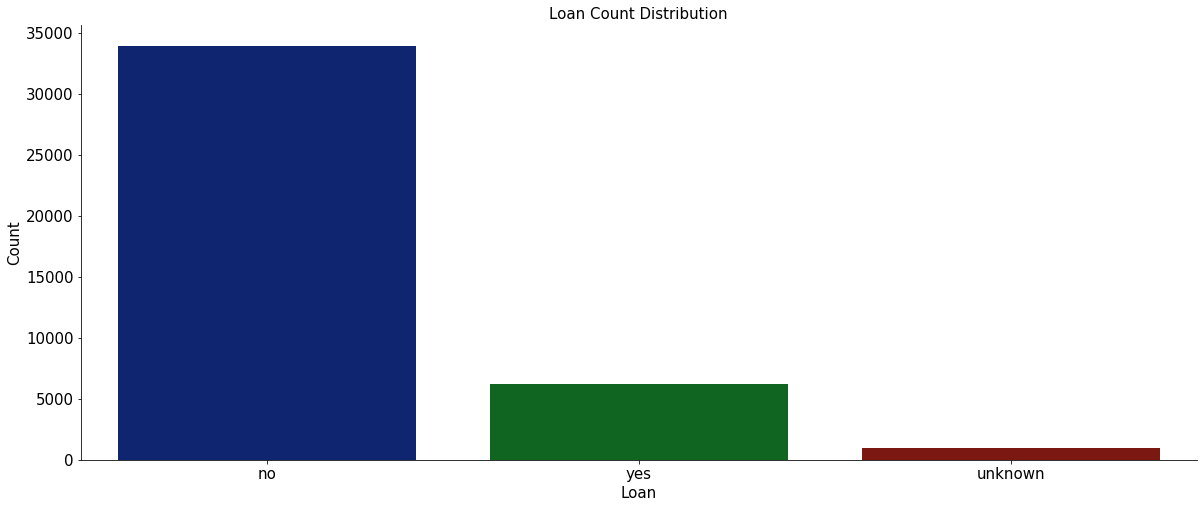

In [33]:
# Loan Histogram
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'loan', data = client)
ax.set_xlabel('Loan', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Loan Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Campaign: Contact

<AxesSubplot:xlabel='contact', ylabel='count'>

Text(0.5, 0, 'Contact')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Contact Count Distribution')

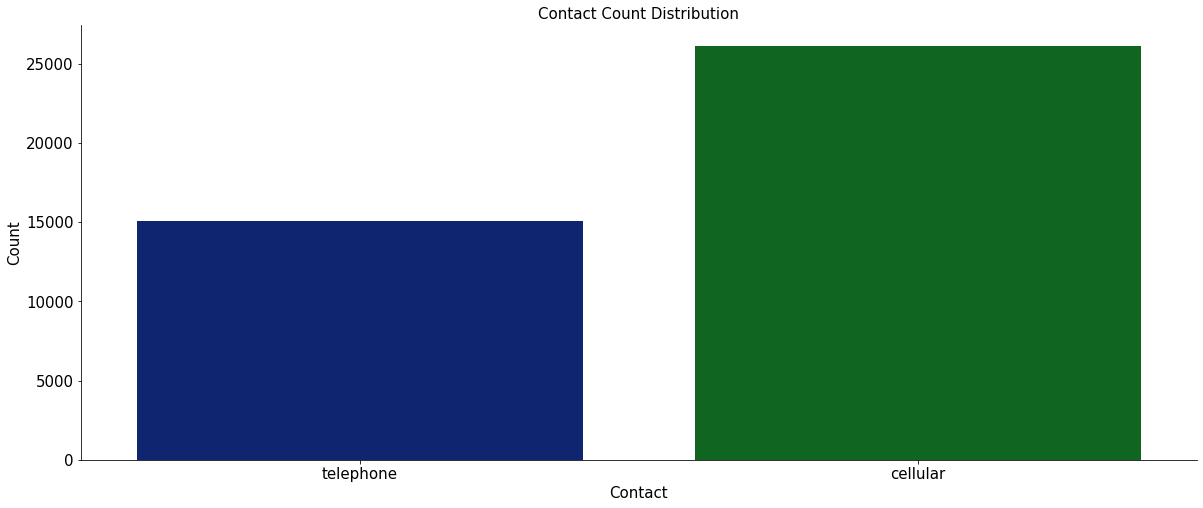

In [34]:
# Contact Histogram
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'contact', data = campaign)
ax.set_xlabel('Contact', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Contact Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Campaign: Month

<AxesSubplot:xlabel='month', ylabel='count'>

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Month Count Distribution')

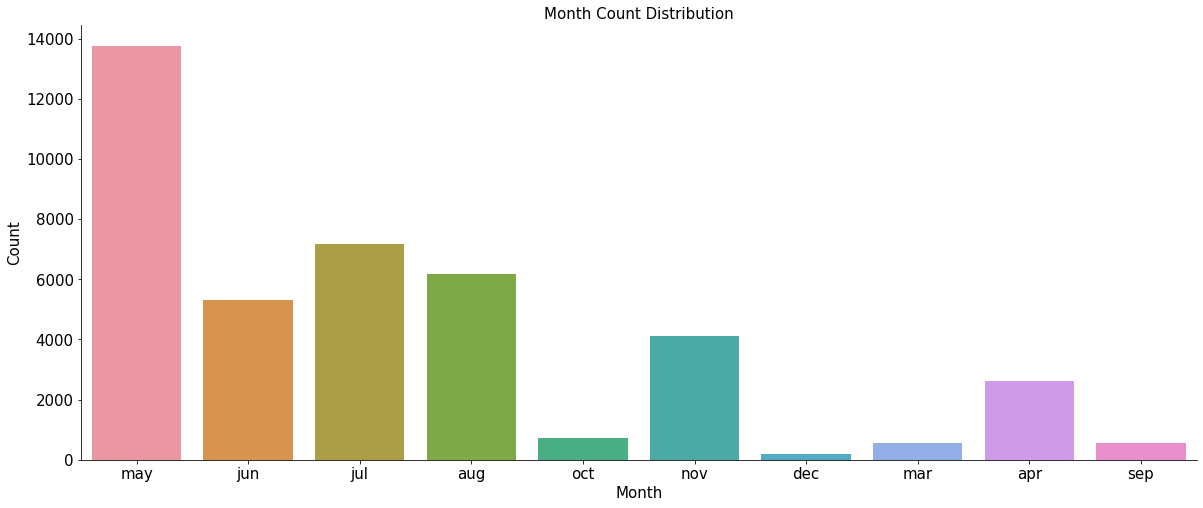

In [35]:
# Month Histogram
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'month', data = campaign)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Month Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Campaign: Day of Week

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

Text(0.5, 0, 'Day of week')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Day of Week Count Distribution')

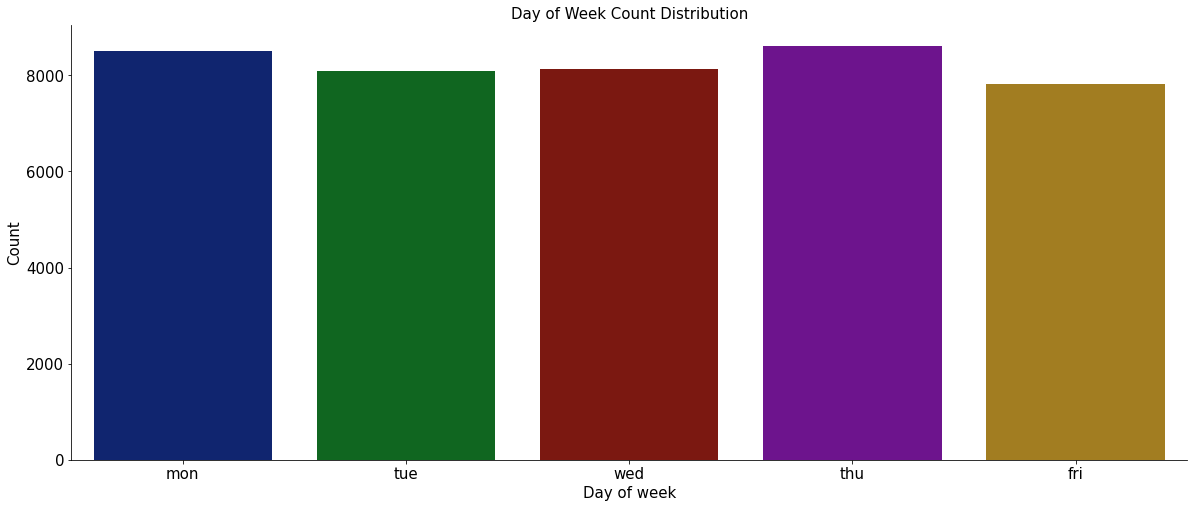

In [36]:
# Day of Week Histogram
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'day_of_week', data = campaign)
ax.set_xlabel('Day of week', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Day of Week Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Campaign: Duration

<AxesSubplot:xlabel='duration', ylabel='count'>

Text(0.5, 0, 'Duration')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Duration Count Distribution')

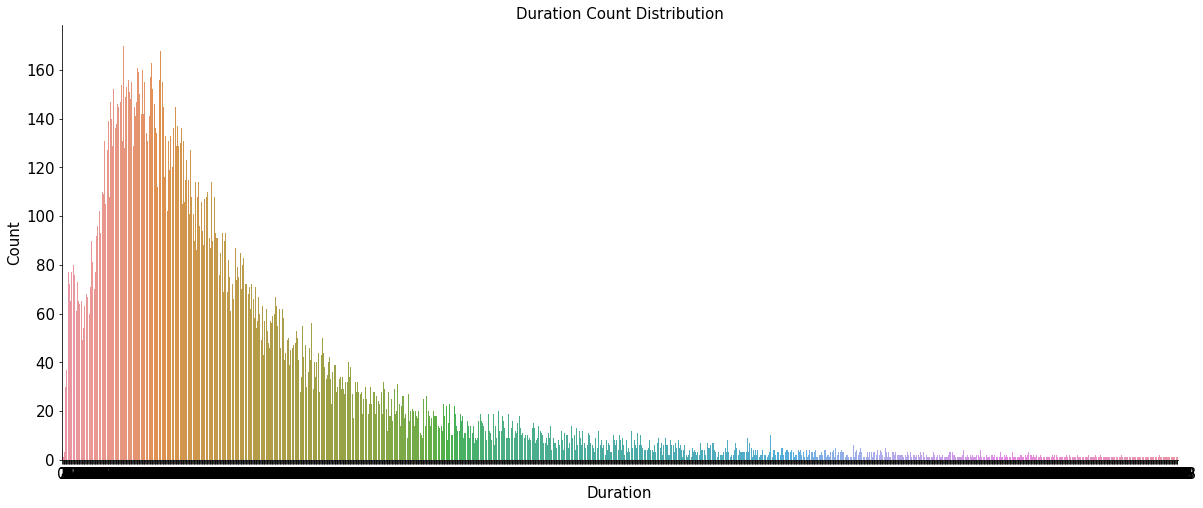

In [37]:
# Duration Histogram
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'duration', data = campaign)
ax.set_xlabel('Duration', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Duration Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

In [38]:
print("Min: ", round(campaign['duration'].min(), 1))
print("Max: ", round(campaign['duration'].max(), 1))
print("Mean: ", round(campaign['duration'].mean(), 1))
print("STD: ", round(campaign['duration'].std(), 1))

Min:  0
Max:  4918
Mean:  258.3
STD:  259.3


In [39]:
#Interquartile range for outlier calculation

duration_iqr = campaign['duration'].quantile(q = 0.75) - campaign['duration'].quantile(q = 0.25)
duration_iqr

217.0

In [40]:
#Mild outlier threshold
duration_mild_outlier = campaign['duration'].quantile(q = 0.75) + 1.5 * duration_iqr
duration_mild_outlier

644.5

In [41]:
# Extreme outlier threshold
duration_extrime_outlier = campaign['duration'].quantile(q = 0.75) + 3 * duration_iqr
duration_extrime_outlier

970.0

In [42]:
# Calculating outliers in numbers and %
duration_mild_outlier_number = campaign[campaign['duration'] > duration_mild_outlier]['duration'].count()
duration_extreme_outlier_number = campaign[campaign['duration'] > duration_extrime_outlier]['duration'].count()
total_observations = len(campaign)
duration_mild_outlier_percent = round(duration_mild_outlier_number/total_observations*100,2)
duration_extreme_outlier_percent = round(duration_extreme_outlier_number/total_observations*100,2)

print('Mild outliers: ', duration_mild_outlier_number, ' or ', duration_mild_outlier_percent ,'%')
print('Extreme outliers: ', duration_extreme_outlier_number, ' or ', duration_extreme_outlier_percent ,'%')
print('Number of clients: ', total_observations)

Mild outliers:  2963  or  7.2 %
Extreme outliers:  1043  or  2.53 %
Number of clients:  41176


In [43]:
# Number of calls with 0 or less minutes, probably a data quality issue so will need to remove 
# In any case, we shouldn't worry about the variable for out final model since number of minutes is not knowns beforehand and will only be known after the call. 
campaign[campaign['duration'] <= 0]['duration'].count()

4

### Campaign: Number of Contacts

<AxesSubplot:xlabel='campaign', ylabel='count'>

Text(0.5, 0, 'Campaign')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Campaign Count Distribution')

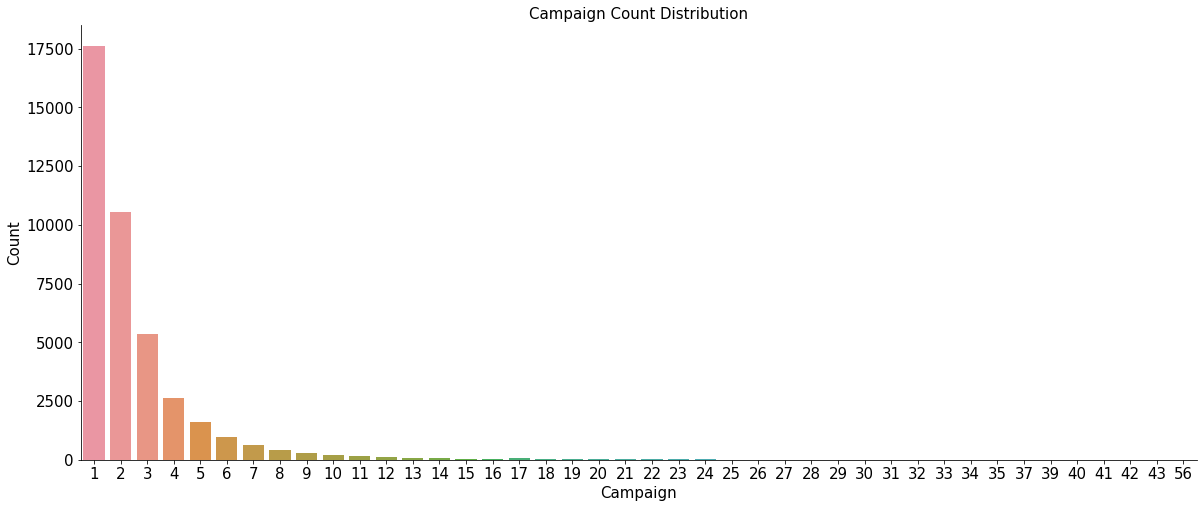

In [44]:
# Campaign Histogram
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'campaign', data = campaign)
ax.set_xlabel('Campaign', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Campaign Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

In [45]:
#Interquartile range for outlier calculation
campaign_iqr = campaign['campaign'].quantile(q = 0.75) - campaign['campaign'].quantile(q = 0.25)
campaign_iqr

#Mild outlier threshold
campaign_mild_outlier = campaign['campaign'].quantile(q = 0.75) + 1.5 * duration_iqr
campaign_mild_outlier

# Extreme outlier threshold
campaign_extrime_outlier = campaign['campaign'].quantile(q = 0.75) + 3 * duration_iqr
campaign_extrime_outlier

2.0

328.5

654.0

In [46]:
# Calculating outliers in numbers and %
campaign_mild_outlier_number = campaign[campaign['campaign'] > campaign_mild_outlier]['campaign'].count()
campaign_extreme_outlier_number = campaign[campaign['campaign'] > campaign_extrime_outlier]['campaign'].count()
total_observations = len(campaign)
campaign_mild_outlier_percent = round(campaign_mild_outlier_number/total_observations*100,2)
campaign_extreme_outlier_percent = round(campaign_extreme_outlier_number/total_observations*100,2)

print('Mild outliers: ', campaign_mild_outlier_number, ' or ', campaign_mild_outlier_percent ,'%')
print('Extreme outliers: ', campaign_extreme_outlier_number, ' or ', campaign_extreme_outlier_percent ,'%')
print('Number of clients: ', total_observations)

Mild outliers:  0  or  0.0 %
Extreme outliers:  0  or  0.0 %
Number of clients:  41176


### Campaign: Days Since Last Contact

<AxesSubplot:xlabel='pdays', ylabel='count'>

Text(0.5, 0, 'Days Since Last Contact')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Days Since Last Contact Count Distribution')

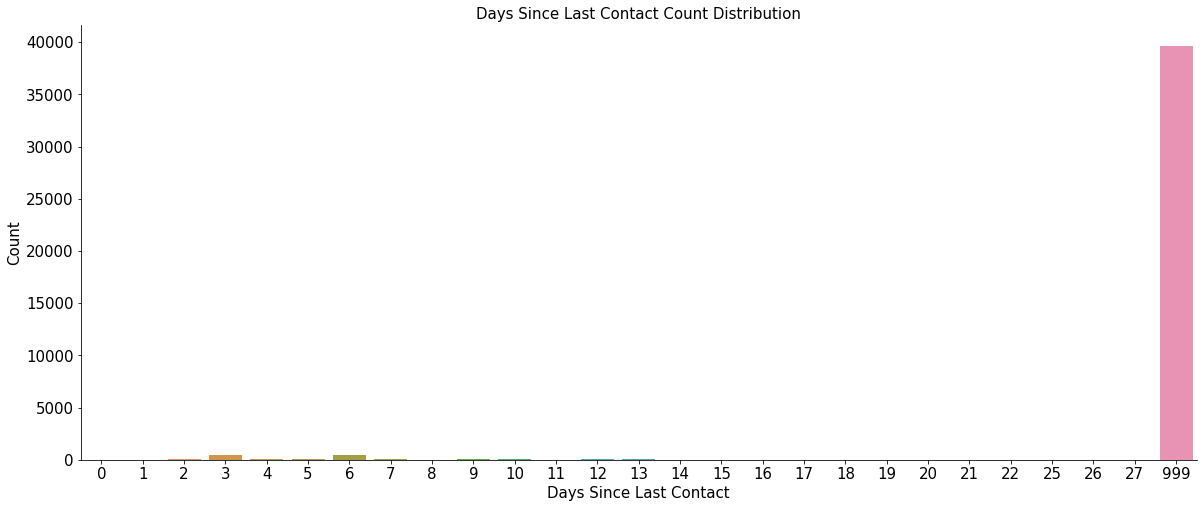

In [47]:
# Days Since Last Contact Histogram
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'pdays', data = campaign)
ax.set_xlabel('Days Since Last Contact', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Days Since Last Contact Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Campaign: Number of Contacts Before Campaign

<AxesSubplot:xlabel='previous', ylabel='count'>

Text(0.5, 0, 'Number of Contacts Before Campaign')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Number of Contacts Before Campaign Distribution')

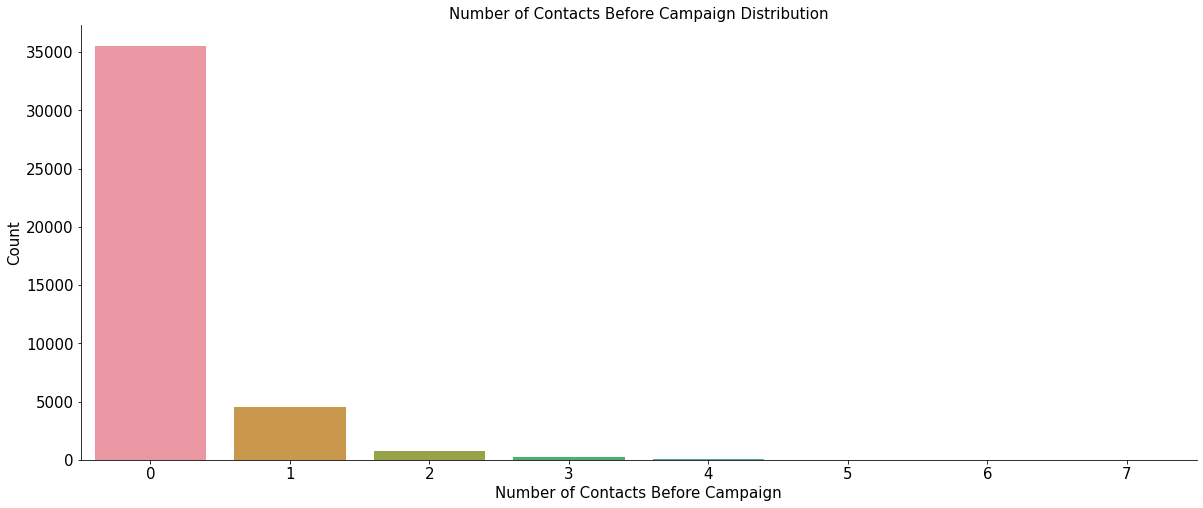

In [48]:
# Number of Contacts Before Campaign Histogram
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'previous', data = campaign)
ax.set_xlabel('Number of Contacts Before Campaign', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Number of Contacts Before Campaign Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Campaign: Previous Outcome

<AxesSubplot:xlabel='poutcome', ylabel='count'>

Text(0.5, 0, 'Outcome')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Previous Outcome Distribution')

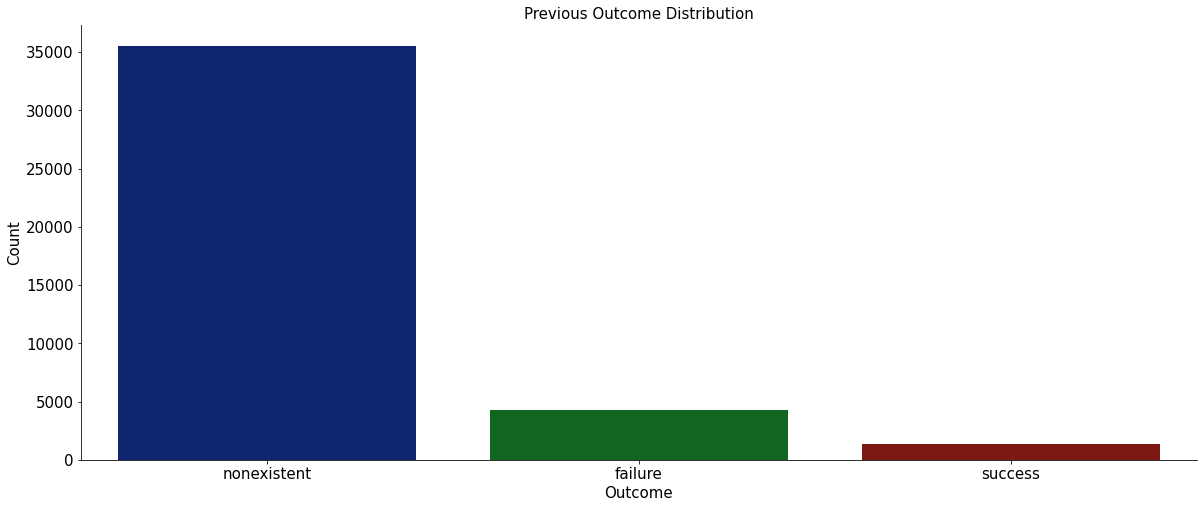

In [49]:
# Previous Outcome Histogram
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'poutcome', data = campaign)
ax.set_xlabel('Outcome', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Previous Outcome Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Economy: Employment Variation Rate

<AxesSubplot:xlabel='emp.var.rate', ylabel='count'>

Text(0.5, 0, 'Employment Variation Rate')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Employment Variation Rate Distribution')

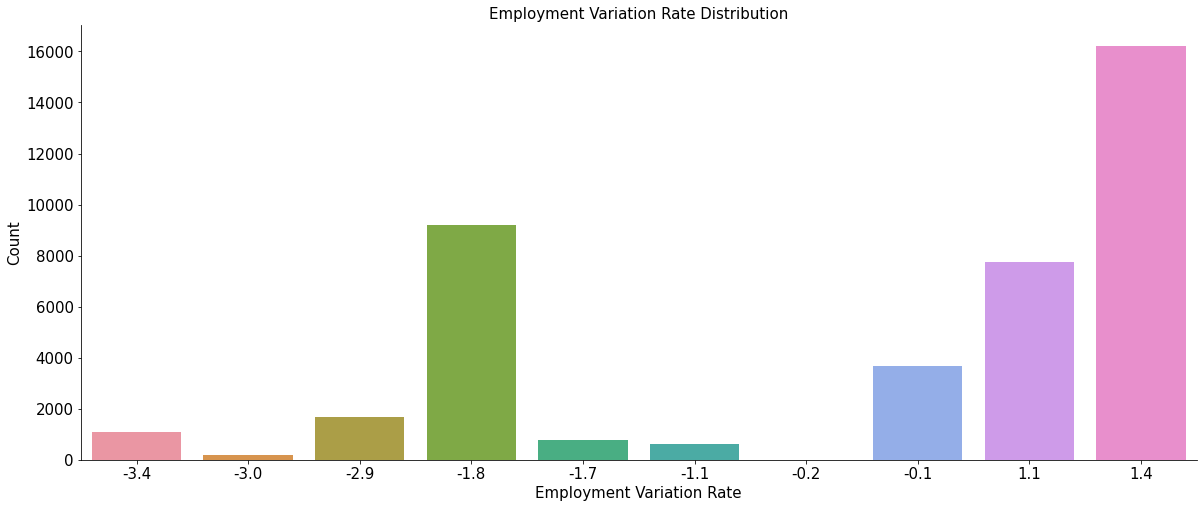

In [50]:
# Employment Variation Rate Histogram
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'emp.var.rate', data = econ)
ax.set_xlabel('Employment Variation Rate', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Employment Variation Rate Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Economy: Consumer Price Index

In [51]:
# Description: 
# The Consumer Price Index (CPI) represents changes in prices as experienced by consumers. 
# It measures price change by comparing, through time, the cost of a fixed basket of goods and services.

In [52]:
econ['cons.price.idx'].head()

0    93.994
1    93.994
2    93.994
3    93.994
4    93.994
Name: cons.price.idx, dtype: float64

In [53]:
print("Min: ", econ['cons.price.idx'].min())
print("Max: ", econ['cons.price.idx'].max())
print("Mean: ", econ['cons.price.idx'].mean())
print("STD: ", econ['cons.price.idx'].std())

Min:  92.20100000000001
Max:  94.76700000000001
Mean:  93.57571988542011
STD:  0.5788389855564238


In [54]:
#Rounding consumer price index so its easier to plot
econ = econ.round({'cons.price.idx':1})
econ.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,94.0,-36.4,4.857,5191.0
1,1.1,94.0,-36.4,4.857,5191.0
2,1.1,94.0,-36.4,4.857,5191.0
3,1.1,94.0,-36.4,4.857,5191.0
4,1.1,94.0,-36.4,4.857,5191.0


<AxesSubplot:xlabel='cons.price.idx', ylabel='count'>

Text(0.5, 0, 'Consumer Price Index')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Consumer Price Index Distribution')

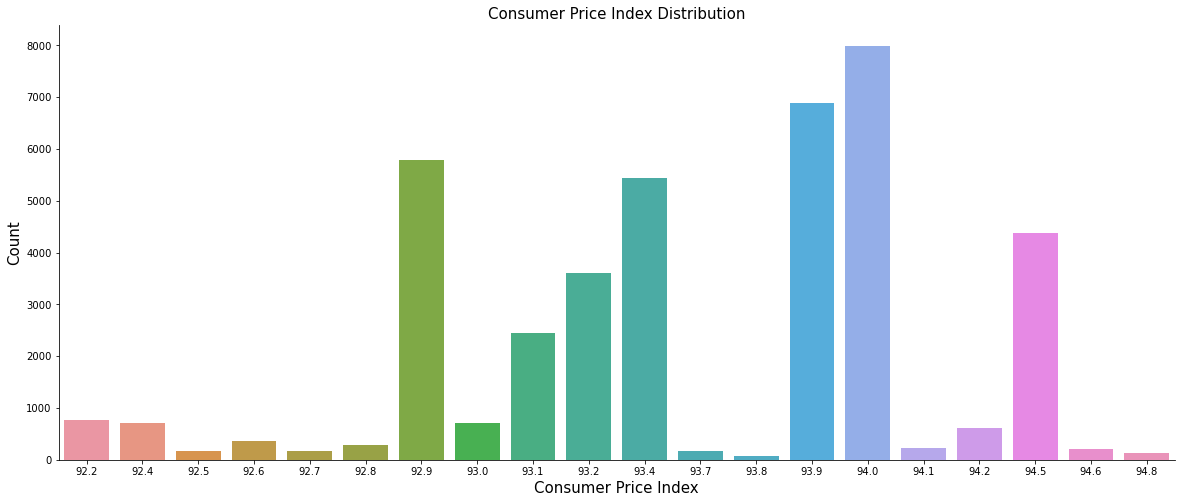

In [55]:
# Consumer Price Index Histogram
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'cons.price.idx', data = econ)
ax.set_xlabel('Consumer Price Index', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Consumer Price Index Distribution', fontsize=15)
ax.tick_params(labelsize=10)
sns.despine()

### Economy: Consumer Confidence Index

In [56]:
# Description:
# Consumer confidence index (CCI) provides an indication of future developments of households' consumption and saving,
# based upon answers regarding their expected financial situation, their sentiment about the general economic situation,
# unemployment and capability of savings.

<AxesSubplot:xlabel='cons.conf.idx', ylabel='count'>

Text(0.5, 0, 'Consumer Confidence Index')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Consumer Confidence Index Distribution')

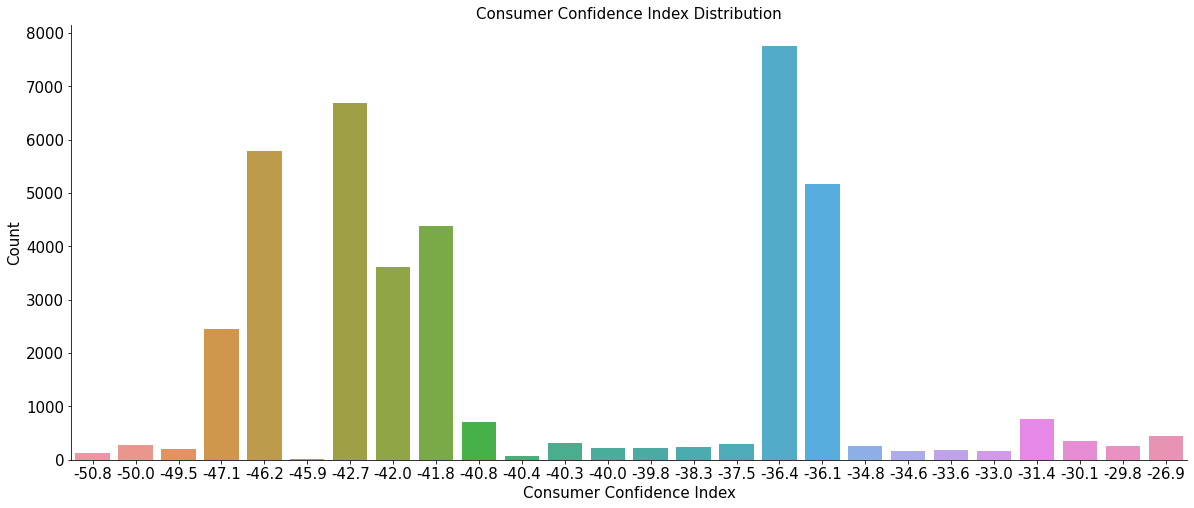

In [57]:
# Consumer Confidence Index Histogram
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'cons.conf.idx', data = econ)
ax.set_xlabel('Consumer Confidence Index', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Consumer Confidence Index Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Economy: Euribor 3 Month Rate

In [58]:
# Description:
# The 3 month Euribor interest rate is the interest rate at which a selection of European banks lend one another funds 
# denominated in euros whereby the loans have a maturity of 3 months.

In [59]:
econ['euribor3m'].head()

0    4.857
1    4.857
2    4.857
3    4.857
4    4.857
Name: euribor3m, dtype: float64

In [60]:
print('Min: ', econ['euribor3m'].min())
print('Q1: ', econ['euribor3m'].quantile(q = 0.25))
print('Mean: ', econ['euribor3m'].mean())
print('Median: ', econ['euribor3m'].median())
print('Q3: ', econ['euribor3m'].quantile(q = 0.75))
print('Max: ', econ['euribor3m'].max())

Min:  0.634
Q1:  1.344
Mean:  3.6212934476393523
Median:  4.857
Q3:  4.961
Max:  5.045


In [61]:
#Creating a column with only the integer part of the index
econ['euribor3m_int'] = econ.apply(lambda row: row.euribor3m.astype(int), axis=1)
econ.head(10)

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,euribor3m_int
0,1.1,94.0,-36.4,4.857,5191.0,4
1,1.1,94.0,-36.4,4.857,5191.0,4
2,1.1,94.0,-36.4,4.857,5191.0,4
3,1.1,94.0,-36.4,4.857,5191.0,4
4,1.1,94.0,-36.4,4.857,5191.0,4
5,1.1,94.0,-36.4,4.857,5191.0,4
6,1.1,94.0,-36.4,4.857,5191.0,4
7,1.1,94.0,-36.4,4.857,5191.0,4
8,1.1,94.0,-36.4,4.857,5191.0,4
9,1.1,94.0,-36.4,4.857,5191.0,4


<AxesSubplot:xlabel='euribor3m_int', ylabel='count'>

Text(0.5, 0, 'Euribor 3 Month Rate')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Euribor 3 Month Rate Distribution')

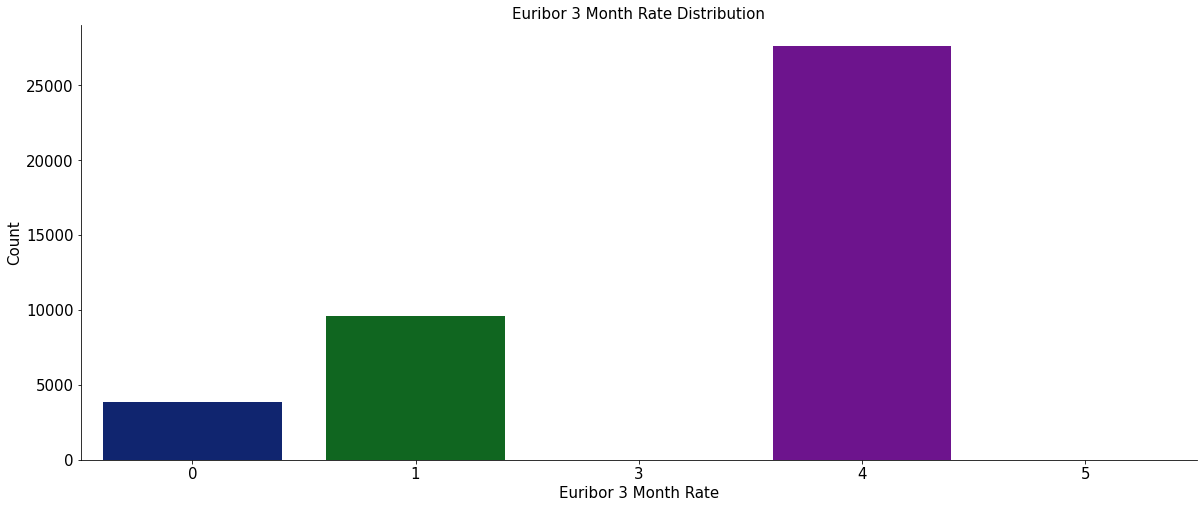

In [62]:
# Euribor 3 Month Rate (Integer) Histogram
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'euribor3m_int', data = econ)
ax.set_xlabel('Euribor 3 Month Rate', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Euribor 3 Month Rate Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### Economy: Number of Employees

<AxesSubplot:xlabel='nr.employed', ylabel='count'>

Text(0.5, 0, 'Number of Employees')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Number of Employees Distribution')

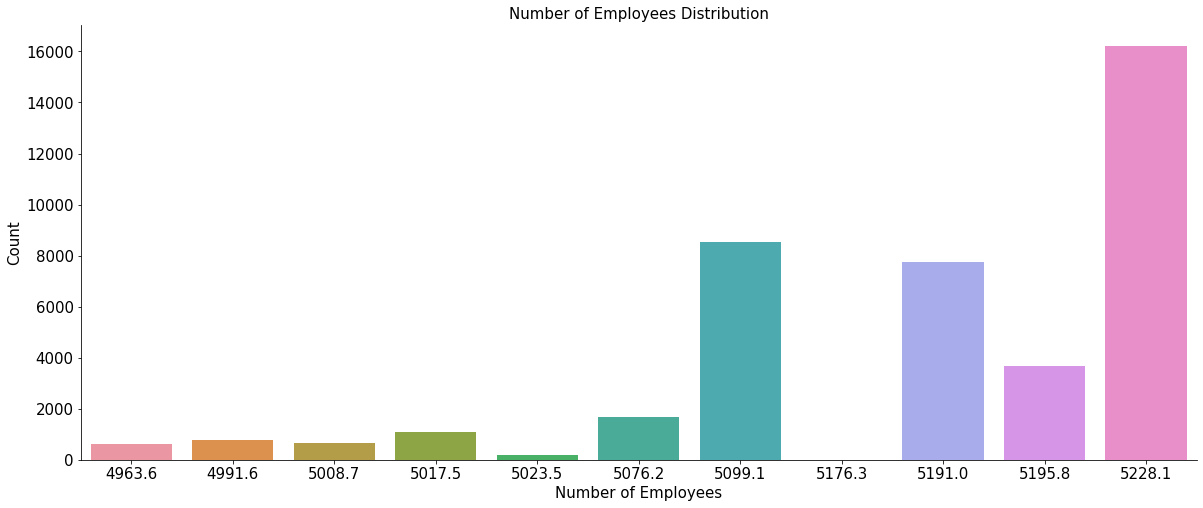

In [63]:
# Number of Employees Histogram
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'nr.employed', data = econ)
ax.set_xlabel('Number of Employees', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Number of Employees Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

## Correlation Analysis

In [64]:
# Turn Y variable int 0/1
dataset['y'] = dataset['y'].map(
                   {'yes':1 ,'no':0})

In [65]:
#Get the list of numeric fields in the dataset again (this time should be all variables)
numbers = list(dataset.select_dtypes(include = np.number).columns)
numbers

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [66]:
# create a dataset with only numbers
numbers_df = dataset[numbers]
numbers_df.head(10)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,3,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,2,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,2,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,3,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
5,2,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
6,3,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
7,2,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
8,1,380,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
9,1,50,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [67]:
#calculate correlations of numeric columns
corr = numbers_df.corr()
corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.003867,0.005580,-0.018379,0.013033,0.021242,0.013500,0.108773,0.031551,0.009018,0.009840
duration,-0.003867,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672,0.405297
campaign,0.005580,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129,-0.066361
pdays,-0.018379,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659,-0.324948
previous,0.013033,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411,0.230202
emp.var.rate,0.021242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949,-0.298289
cons.price.idx,0.013500,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945,-0.136134
cons.conf.idx,0.108773,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679,0.054802
euribor3m,0.031551,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146,-0.307740
nr.employed,0.009018,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000,-0.354669


In [68]:
#get list of correlation with the target Y & rest of features
corr_y = corr['y'].sort_values(ascending=False)
corr_y

y                 1.000000
duration          0.405297
previous          0.230202
cons.conf.idx     0.054802
age               0.009840
campaign         -0.066361
cons.price.idx   -0.136134
emp.var.rate     -0.298289
euribor3m        -0.307740
pdays            -0.324948
nr.employed      -0.354669
Name: y, dtype: float64

In [69]:
# Label encoder order is alphabetical

#from sklearn.preprocessing import LabelEncoder
#labelencoder_X = LabelEncoder()

#dataset_dummy = dataset

#dataset_dummy['job']      = labelencoder_X.fit_transform(dataset_dummy['job']) 
#dataset_dummy['marital']  = labelencoder_X.fit_transform(dataset_dummy['marital']) 
#dataset_dummy['education']= labelencoder_X.fit_transform(dataset_dummy['education']) 
#dataset_dummy['default']  = labelencoder_X.fit_transform(dataset_dummy['default']) 
#dataset_dummy['housing']  = labelencoder_X.fit_transform(dataset_dummy['housing']) 
#dataset_dummy['loan']     = labelencoder_X.fit_transform(dataset_dummy['loan'])

#dataset_dummy['contact']     = labelencoder_X.fit_transform(dataset_dummy['contact']) 
#dataset_dummy['month']       = labelencoder_X.fit_transform(dataset_dummy['month']) 
#dataset_dummy['day_of_week'] = labelencoder_X.fit_transform(dataset_dummy['day_of_week']) 

#dataset_dummy['poutcome'] = labelencoder_X.fit_transform(dataset_dummy['day_of_week']) 

In [70]:

#labelencoder_X.fit_transform(dataset_dummy['education'])

## Dummy Creation

In [71]:
dataset_dummy = pd.get_dummies(dataset)
dataset_dummy.head(10)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_Basic,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,3,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,3,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,2,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,2,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,3,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
5,2,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
6,3,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
7,2,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
8,1,380,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
9,1,50,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [72]:
#Get the list of numeric fields in the dataset again (this time should be all variables)
numbers_dummy = list(dataset_dummy.select_dtypes(include = np.number).columns)
numbers_dummy

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_

In [73]:
# ToDo: 
# Outliers - maybe remove extreme outliers? 
#   Drop Age < 18 and more > 90? 
# Unknowns - Probs keep as is 
# Correlated Vars? - Thinking of dropping emp.var rate and n.employees
# Multi-colinear? - Probs not needed

# Modeling

In [74]:
# dropping duration
#df_final = dataset_dummy.drop(['duration', 'nr.employed', 'emp.var.rate'],axis = 1)
df_final = dataset_dummy.drop(['duration'],axis = 1)
df_final.head(10)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_Basic,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,3,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,3,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,2,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,2,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,3,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
5,2,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
6,3,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
7,2,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
8,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
9,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [75]:
# Splitting test and train
y = df_final.y
X = df_final.drop('y', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=93)

In [76]:
#SMOTE
#from imblearn.over_sampling import SMOTE

#os = SMOTE(random_state=0)
#columns = X_train.columns

#os_data_X,os_data_y=os.fit_resample(X_train, y_train)
#os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
#os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
### we can Check the numbers of our data
#print("length of oversampled data is ",len(os_data_X))
#print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
#print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
#print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
#print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

In [77]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [78]:
# Mean-centereing the train and test sets
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
#X_train_smote = sc_X.fit_transform(os_data_X)
X_test = sc_X.transform(X_test)

X_train = pd.DataFrame(X_train, columns=df_final.drop('y',axis=1).columns)
X_test = pd.DataFrame(X_test, columns=df_final.drop('y',axis=1).columns)

#X_train_smote = os_data_X
X_train.head(10)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_Basic,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.026914,-0.575786,0.198717,-0.352943,-0.113009,-0.645724,-0.325402,0.288837,0.398676,1.722684,-0.534610,-0.190696,-0.163703,-0.276857,-0.208849,-0.190594,-0.323874,-0.146805,-0.449497,-0.160286,-0.085671,-0.357743,-1.239557,1.607521,-0.042182,-0.659624,1.835721,-0.020861,-0.386908,-0.648100,-0.208187,0.510886,-0.510773,-0.008515,1.101515,-0.155828,-1.050232,0.462893,-0.155828,-0.42461,0.754885,-0.754885,-0.260492,-0.422109,-0.068275,-0.459483,-0.385110,-0.117232,-0.703726,2.983624,-0.132788,-0.119281,-0.483893,-0.509476,-0.513480,-0.494591,2.006229,-0.342344,0.402003,-0.188232
1,0.026914,-0.575786,0.198717,-0.352943,0.649483,0.727922,0.885313,0.712429,0.332377,-0.580490,-0.534610,-0.190696,-0.163703,-0.276857,-0.208849,-0.190594,3.087622,-0.146805,-0.449497,-0.160286,-0.085671,-0.357743,0.806740,-0.622076,-0.042182,-0.659624,-0.544745,-0.020861,2.584593,-0.648100,-0.208187,-1.957383,1.957815,-0.008515,-0.907841,-0.155828,0.952170,0.462893,-0.155828,-0.42461,-1.324705,1.324705,-0.260492,-0.422109,-0.068275,-0.459483,-0.385110,-0.117232,1.421008,-0.335163,-0.132788,-0.119281,-0.483893,-0.509476,1.947495,-0.494591,-0.498448,-0.342344,0.402003,-0.188232
2,-1.335412,-0.575786,0.198717,-0.352943,0.649483,0.727922,0.885313,0.714158,0.332377,-0.580490,1.870524,-0.190696,-0.163703,-0.276857,-0.208849,-0.190594,-0.323874,-0.146805,-0.449497,-0.160286,-0.085671,-0.357743,0.806740,-0.622076,-0.042182,1.516015,-0.544745,-0.020861,-0.386908,-0.648100,-0.208187,-1.957383,1.957815,-0.008515,-0.907841,-0.155828,0.952170,0.462893,-0.155828,-0.42461,-1.324705,1.324705,-0.260492,-0.422109,-0.068275,-0.459483,-0.385110,-0.117232,1.421008,-0.335163,-0.132788,-0.119281,-0.483893,-0.509476,-0.513480,-0.494591,2.006229,-0.342344,0.402003,-0.188232
3,1.389239,-0.575786,0.198717,-0.352943,0.649483,0.727922,0.885313,0.713006,0.332377,-0.580490,-0.534610,-0.190696,-0.163703,3.611971,-0.208849,-0.190594,-0.323874,-0.146805,-0.449497,-0.160286,-0.085671,-0.357743,0.806740,-0.622076,-0.042182,-0.659624,1.835721,-0.020861,-0.386908,-0.648100,-0.208187,-1.957383,1.957815,-0.008515,-0.907841,-0.155828,0.952170,0.462893,-0.155828,-0.42461,-1.324705,1.324705,-0.260492,-0.422109,-0.068275,-0.459483,-0.385110,-0.117232,1.421008,-0.335163,-0.132788,-0.119281,-0.483893,-0.509476,-0.513480,-0.494591,2.006229,-0.342344,0.402003,-0.188232
4,-1.335412,-0.575786,0.198717,-0.352943,0.840106,0.596439,-0.476742,0.774672,0.844807,-0.580490,1.870524,-0.190696,-0.163703,-0.276857,-0.208849,-0.190594,-0.323874,-0.146805,-0.449497,-0.160286,-0.085671,-0.357743,0.806740,-0.622076,-0.042182,1.516015,-0.544745,-0.020861,-0.386908,-0.648100,-0.208187,0.510886,-0.510773,-0.008515,1.101515,-0.155828,-1.050232,0.462893,-0.155828,-0.42461,0.754885,-0.754885,-0.260492,-0.422109,-0.068275,2.176358,-0.385110,-0.117232,-0.703726,-0.335163,-0.132788,-0.119281,-0.483893,-0.509476,-0.513480,-0.494591,2.006229,-0.342344,0.402003,-0.188232
5,0.026914,-0.206926,0.198717,-0.352943,0.840106,1.542767,-0.282162,0.772366,0.844807,-0.580490,1.870524,-0.190696,-0.163703,-0.276857,-0.208849,-0.190594,-0.323874,-0.146805,-0.449497,-0.160286,-0.085671,-0.357743,0.806740,-0.622076,

## Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression
model_logreg = LogisticRegression() 
model_logreg.fit(X_train,y_train)
model_logreg_pred = model_logreg.predict(X_test)


print(confusion_matrix(y_test, model_logreg_pred))
print(round(accuracy_score(y_test, model_logreg_pred),2)*100)

cv_logreg = (cross_val_score(model_logreg, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

LogisticRegression()

[[11929   151]
 [ 1176   333]]
90.0


In [80]:
#Smoted Version
#from sklearn.linear_model import LogisticRegression
#model_logreg_smote = LogisticRegression() 
#model_logreg_smote.fit(X_train_smote,os_data_y)
#model_logreg_pred_smote = model_logreg_smote.predict(X_test)


#print(confusion_matrix(y_test, model_logreg_pred_smote))
#print(round(accuracy_score(y_test, model_logreg_pred_smote),2)*100)

#cv_logreg_smote = (cross_val_score(model_logreg_smote, X_train_smote, os_data_y, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

Text(0.5, 1.0, 'Receiver Operating Characteristic Logistic ')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

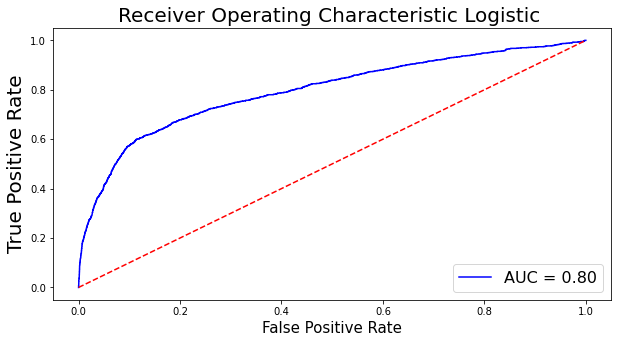

In [97]:
#Logistic Regression AUC

model_logreg_prob = model_logreg.predict_proba(X_test)
model_logreg_pred = model_logreg_prob[:,1]

model_logreg_fpr, model_logreg_tpr, model_logreg_threshold = metrics.roc_curve(y_test, model_logreg_pred)
model_logreg_roc_auc = metrics.auc(model_logreg_fpr, model_logreg_tpr)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,5))

ax.plot(model_logreg_fpr, model_logreg_tpr, 'b', label = 'AUC = %0.2f' % model_logreg_roc_auc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

<AxesSubplot:>

Text(0.5, 1.0, 'Threshold = 0.4')

Text(0.5, 17.5, 'actual class')

Text(21.1, 0.5, 'predicted class')

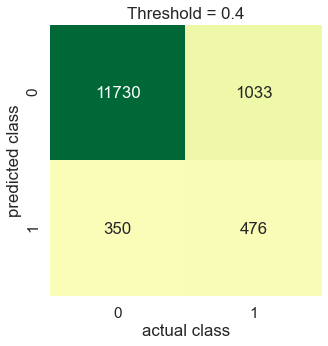

In [119]:
#confusion matrix for logistic regression
model_logreg_prob1 = (model_logreg.predict_proba(X_test)[:, 1] > 0.4)


mat = confusion_matrix(y_test,model_logreg_prob1)
figure1 = plt.figure(figsize=[5,5])
sns.set(font_scale=1.4)
sns.heatmap(mat.T, square=True,annot=True,fmt='d',cbar=False,cmap='RdYlGn',center = 0.117)
plt.title('Threshold = 0.4')
plt.xlabel('actual class')
plt.ylabel('predicted class')

In [82]:
print("Coefficient of Logistic Regression")
for i in range(0, len(model_logreg.coef_[0])) :
    print('{} : {}'.format(X_train.columns[i], model_logreg.coef_[0][i]))


Coefficient of Logistic Regression
age : -0.022584027961521768
campaign : -0.09072362507075048
pdays : -0.21287027143595627
previous : -0.04737391634861697
emp.var.rate : -2.151380453883621
cons.price.idx : 1.0305950623523583
cons.conf.idx : 0.09545063118596975
euribor3m : 0.6040392530994956
nr.employed : 0.15620938256277553
job_admin. : 0.03360912648069982
job_blue-collar : -0.05298409499994044
job_entrepreneur : -0.0015512727859504792
job_housemaid : -0.00674644332534001
job_management : -0.0019440651292364152
job_retired : 0.046483709600771445
job_self-employed : 0.0019788075096205462
job_services : -0.03324997675192775
job_student : 0.022856207312588066
job_technician : 0.015795523450485034
job_unemployed : 0.00876496289969437
job_unknown : -0.01390721372931354
marital_divorced : -0.005672426438315774
marital_married : 0.009869807189848449
marital_single : -0.0068800733315290755
marital_unknown : 0.0014621819166378723
education_Basic : -0.012196693736343592
education_high.school : 

In [83]:
coefdf = pd.DataFrame(data=X_train.columns, index=range(0, len(model_logreg.coef_[0])), columns=['Feature'])
coefdf['Coef'] = model_logreg.coef_[0]
coefdf['Absuolute num of Coef'] = abs(model_logreg.coef_[0])
coefdf = coefdf.sort_values(by='Absuolute num of Coef', ascending=False).reset_index(drop=True)
coefdf

,Feature,Coef,Absuolute num of Coef
0,emp.var.rate,-2.151380,2.151380
1,cons.price.idx,1.030595,1.030595
2,euribor3m,0.604039,0.604039
3,pdays,-0.212870,0.212870
4,month_aug,0.209752,0.209752
5,month_mar,0.182512,0.182512
6,contact_cellular,0.170267,0.170267
7,contact_telephone,-0.170267,0.170267
8,nr.employed,0.156209,0.156209
9,month_jun,-0.138311,0.138311


In [84]:
bcd = {'age', 'job', 'marital', 'education', 'default', 'housing', 'loan'}
lc = {'contact', 'month', 'day_of_week', 'duration'}
oth = {'campaign', 'pdays', 'previous', 'poutcome'}
sec = {'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'}

coefdf['Category'] = 0
for i in range(0,coefdf.shape[0]) : 
    if coefdf['Feature'][i] in bcd : 
        coefdf['Category'][i] = 'Bank Client'
    elif coefdf['Feature'][i] in lc : 
        coefdf['Category'][i] = 'Last Contact'
    elif coefdf['Feature'][i] in oth : 
        coefdf['Category'][i] = 'Other'
    else : 
        coefdf['Category'][i] = 'Social Economic'    
coefdf.sort_values(by='Absuolute num of Coef', ascending=False)

<ipython-input-84-25de98b833dc>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coefdf['Category'][i] = 'Social Economic'
C:\Users\Dims\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-84-25de98b833dc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coefdf['Category'][i] = 'Other'
<ipython-input-84-25de98b833dc>:9: Settin

,Feature,Coef,Absuolute num of Coef,Category
0,emp.var.rate,-2.151380,2.151380,Social Economic
1,cons.price.idx,1.030595,1.030595,Social Economic
2,euribor3m,0.604039,0.604039,Social Economic
3,pdays,-0.212870,0.212870,Other
4,month_aug,0.209752,0.209752,Social Economic
5,month_mar,0.182512,0.182512,Social Economic
6,contact_cellular,0.170267,0.170267,Social Economic
7,contact_telephone,-0.170267,0.170267,Social Economic
8,nr.employed,0.156209,0.156209,Social Economic
9,month_jun,-0.138311,0.138311,Social Economic


<AxesSubplot:xlabel='Coef', ylabel='Feature'>

(array([-2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 [Text(0, 0, 'emp.var.rate'),
  Text(0, 1, 'cons.price.idx'),
  Text(0, 2, 'euribor3m'),
  Text(0, 3, 'pdays'),
  Text(0, 4, 'month_aug'),
  Text(0, 5, 'month_mar'),
  Text(0, 6, 'contact_cellular'),
  Text(0, 7, 'contact_telephone'),
  Text(0, 8, 'nr.employed'),
  Text(0, 9, 'month_jun'),
  Text(0, 10, 'month_may'),
  Text(0, 11, 'day_of_week_mon'),
  Text(0, 12, 'default_yes'),
  Text(0, 13, 'month_nov'),
  Text(0, 14, 'cons.conf.idx'),
  Text(0, 15, 'campaign'),
  Text(0, 16, 'poutcome_failure'),
  Text(0, 17, 'poutcome_success'),
  Text(0, 18, 'month_jul'),
  Text(0, 19, 'day_of_week_wed'),
  Text(0, 20, 'job_blue-collar'),
  Text(0, 21, 'default_no'),
  Text(0, 22, 'previous'),
  Text(0, 23, 'default_unknown'),


Text(0.5, 1.0, 'Coefficient of Logistic Regression\n(score : 78%)')

Text(0.5, 0, 'Coefficient')

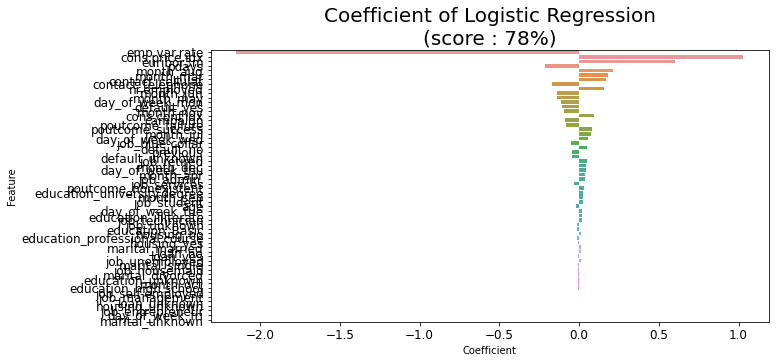

In [85]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=coefdf, y=coefdf['Feature'], x=coefdf['Coef'])

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title('Coefficient of Logistic Regression\n(score : 78%)', fontsize=20)
plt.xlabel('Coefficient')

plt.savefig('Coefficient of Logistic Regression.png')
plt.show()

In [86]:
#Smoted Version
#Logistic Regression AUC

#model_logreg_prob_smote = model_logreg_smote.predict_proba(X_test)
#model_logreg_pred_smote = model_logreg_prob_smote[:,1]

#model_logreg_fpr_smote, model_logreg_tpr_smote, model_logreg_threshold_smote = metrics.roc_curve(y_test, model_logreg_pred_smote)
#model_logreg_roc_auc_smote = metrics.auc(model_logreg_fpr_smote, model_logreg_tpr_smote)

#fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,5))

#ax.plot(model_logreg_fpr_smote, model_logreg_tpr_smote, 'b', label = 'AUC = %0.3f' % model_logreg_roc_auc_smote)
#ax.plot([0, 1], [0, 1],'r--')
#ax.set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
#ax.set_ylabel('True Positive Rate',fontsize=20)
#ax.set_xlabel('False Positive Rate',fontsize=15)
#ax.legend(loc = 'lower right', prop={'size': 16})

## K-means

In [87]:
# Splitting the data again, since the original was mean-centered
from sklearn.cluster import KMeans

X_trainK, X_testK, y_trainK, y_testK = train_test_split(X, y, test_size = 0.2, random_state = 93)

KMeans(n_clusters=1, random_state=0)

KMeans(n_clusters=2, random_state=0)

KMeans(n_clusters=3, random_state=0)

KMeans(n_clusters=4, random_state=0)

KMeans(n_clusters=5, random_state=0)

KMeans(n_clusters=6, random_state=0)

KMeans(n_clusters=7, random_state=0)

KMeans(random_state=0)

KMeans(n_clusters=9, random_state=0)

KMeans(n_clusters=10, random_state=0)

<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, 'Elbow Method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'WCSS')

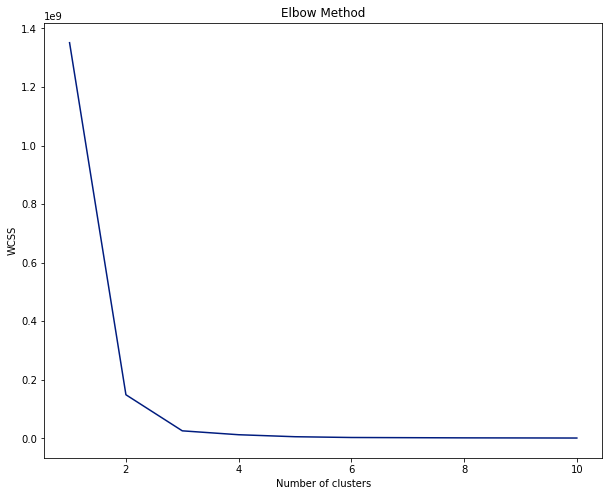

In [88]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_trainK)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=[10,8])
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


## K Nearest Neighbors

k=1 84.97 (+/- 0.44)
k=2 88.94 (+/- 0.49)
k=3 88.15 (+/- 0.39)
k=4 89.30 (+/- 0.52)
k=5 89.06 (+/- 0.41)
k=6 89.44 (+/- 0.54)
k=7 89.39 (+/- 0.46)
k=8 89.57 (+/- 0.62)
k=9 89.56 (+/- 0.56)
k=10 89.65 (+/- 0.63)
k=11 89.59 (+/- 0.57)
k=12 89.59 (+/- 0.64)
k=13 89.60 (+/- 0.55)
k=14 89.64 (+/- 0.58)
k=15 89.59 (+/- 0.56)
k=16 89.63 (+/- 0.51)
k=17 89.60 (+/- 0.46)
k=18 89.64 (+/- 0.51)
k=19 89.59 (+/- 0.50)
k=20 89.68 (+/- 0.55)
k=21 89.63 (+/- 0.46)
k=22 89.72 (+/- 0.54)
k=23 89.69 (+/- 0.48)
k=24 89.76 (+/- 0.44)
k=25 89.72 (+/- 0.45)
The optimal number of neighbors is 23 with 89.8%


Text(0.5, 0, 'Number of Neighbors K')

Text(0, 0.5, 'Train Accuracy')

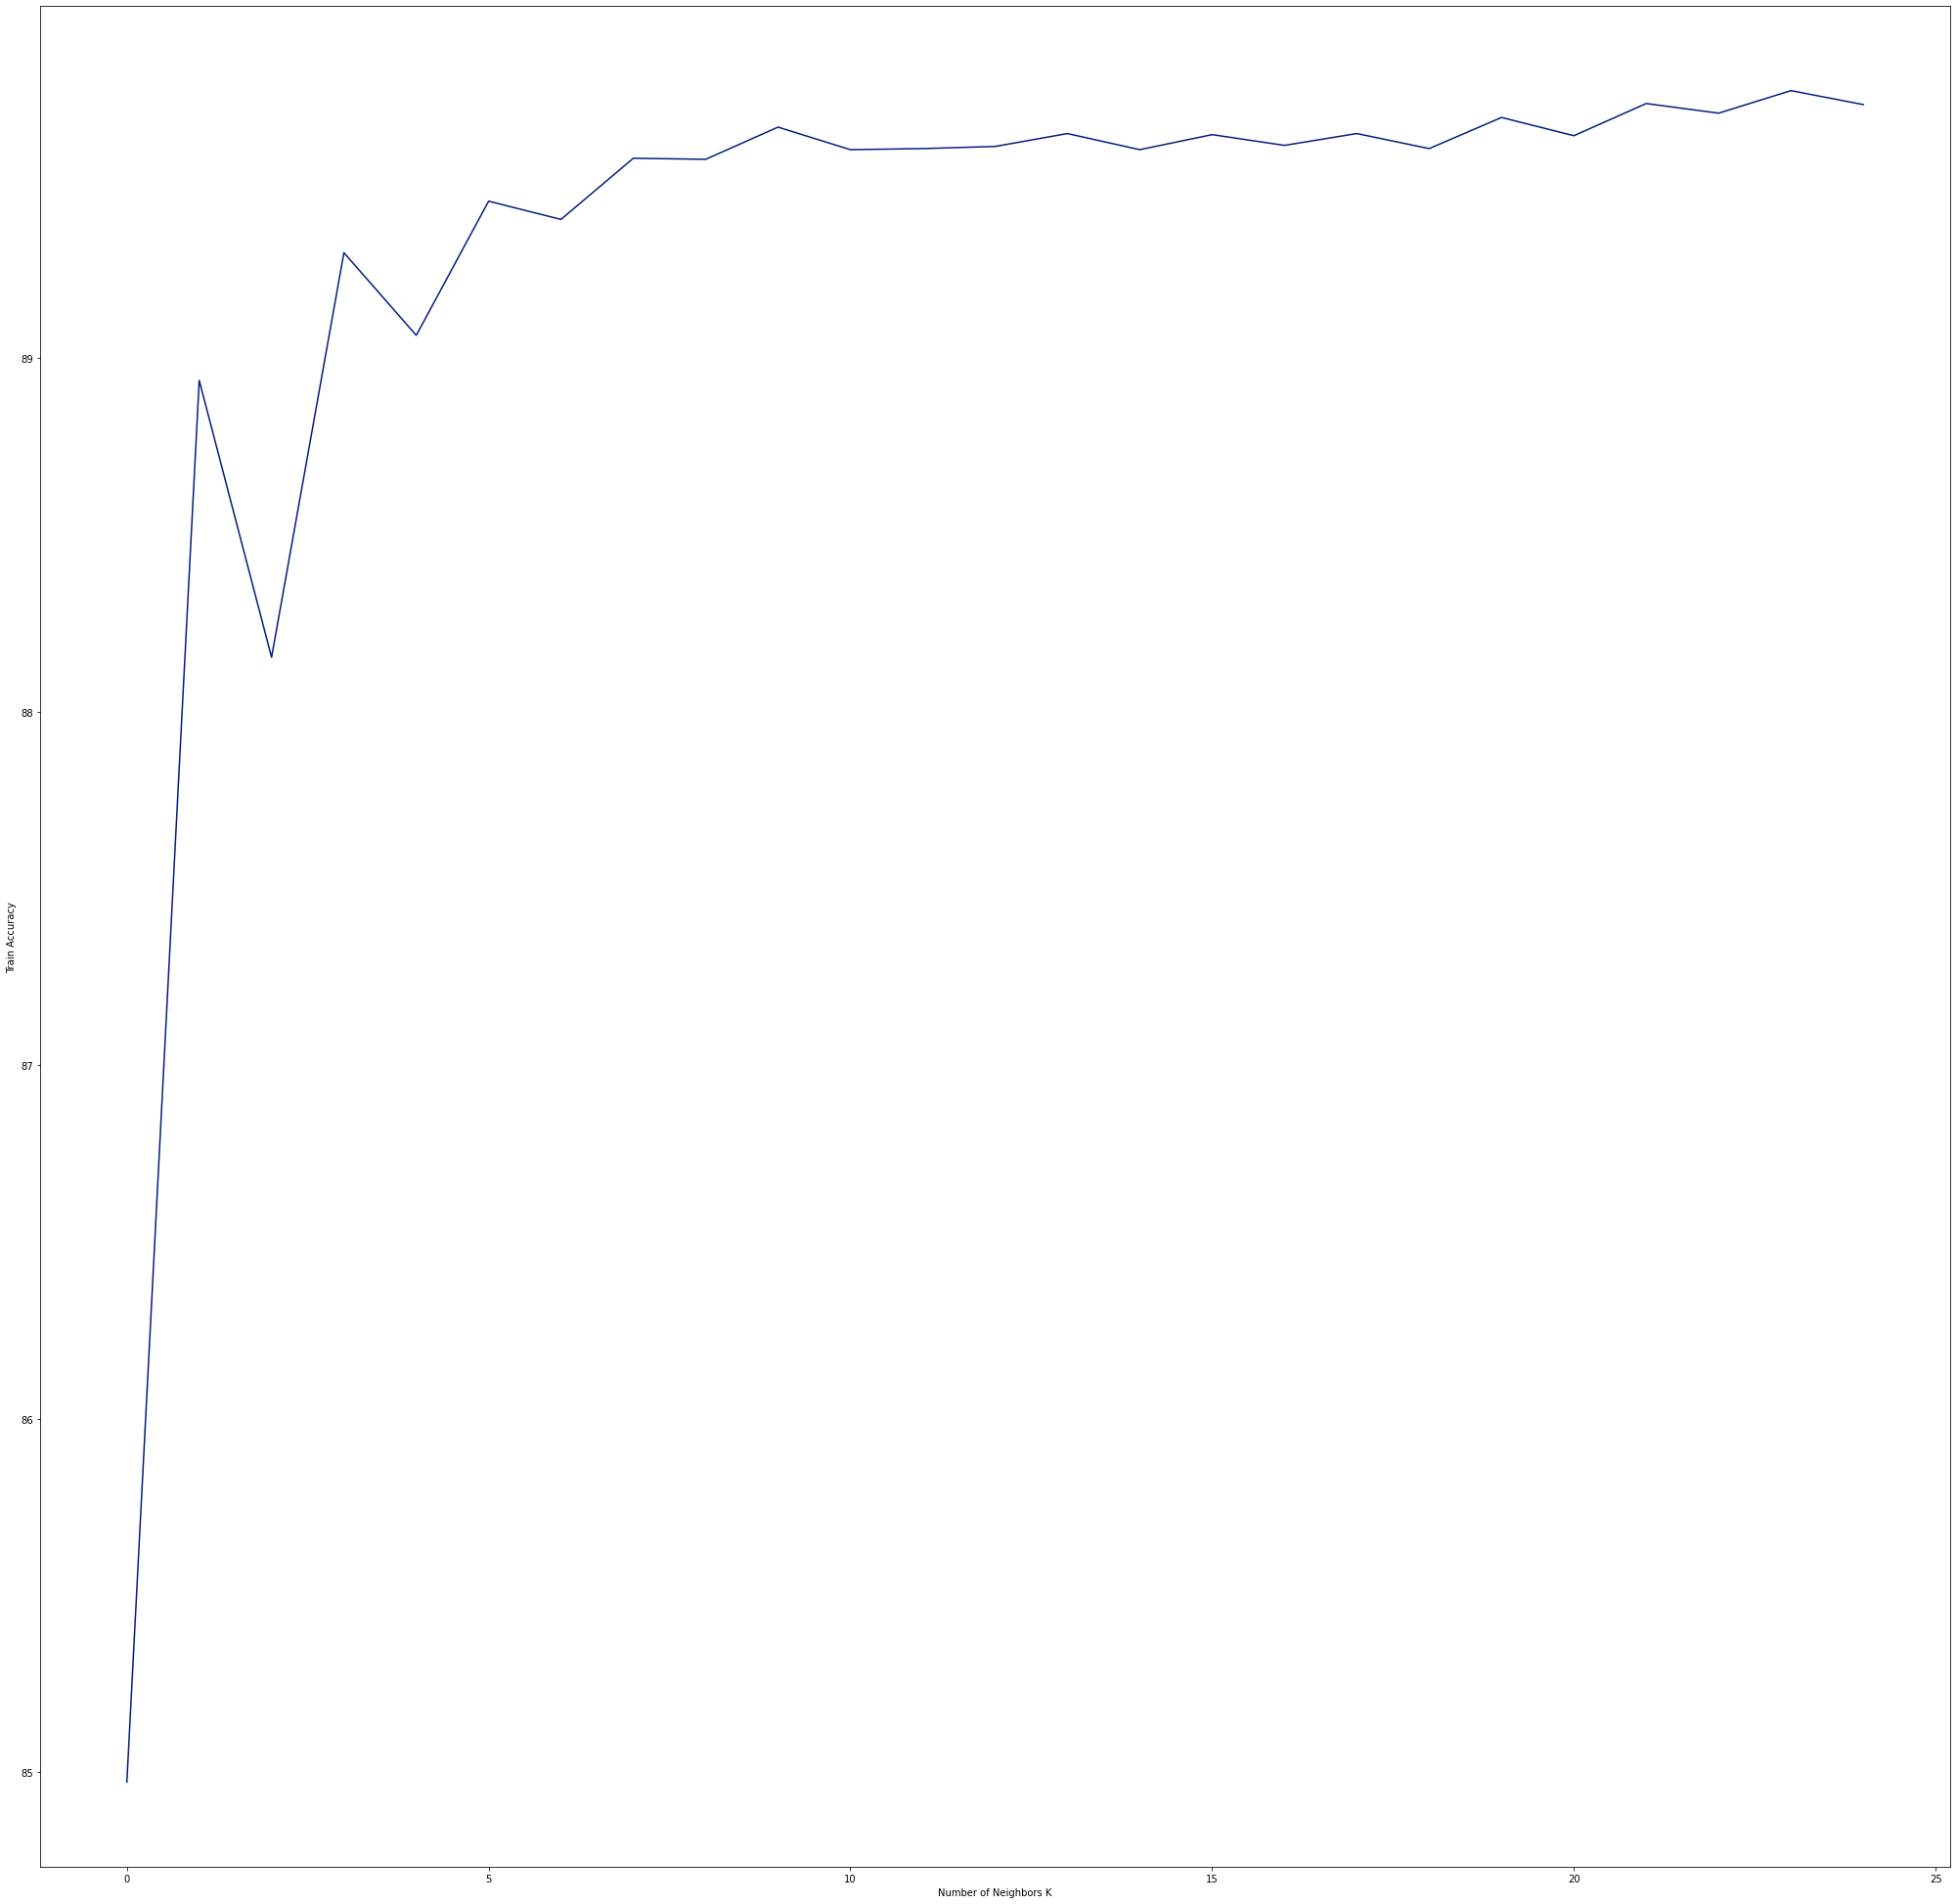

In [89]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [90]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=23)
model_knn.fit(X_train, y_train)

model_knn_pred = model_knn.predict(X_test)

print(confusion_matrix(y_test, model_knn_pred))
print(round(accuracy_score(y_test, model_knn_pred),2)*100)

cv_knn = (cross_val_score(model_knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

KNeighborsClassifier(n_neighbors=23)

[[11887   193]
 [ 1199   310]]
90.0


Text(0.5, 1.0, 'Receiver Operating Characteristic KNN ')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

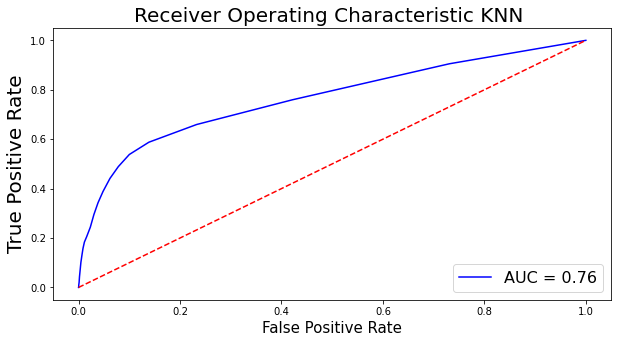

In [91]:
#K Nearest Neighbors AUC

model_knn_prob = model_knn.predict_proba(X_test)
model_knn_pred = model_knn_prob[:,1]

model_knn_fpr, model_knn_tpr, model_knn_threshold = metrics.roc_curve(y_test, model_knn_pred)
model_knn_roc_auc = metrics.auc(model_knn_fpr, model_knn_tpr)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,5))

ax.plot(model_knn_fpr, model_knn_tpr, 'b', label = 'AUC = %0.2f' % model_knn_roc_auc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic KNN ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

## Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(n_estimators = 200) #criterion = entopy,gini
model_rfc.fit(X_train, y_train)

model_rfc_pred = model_rfc.predict(X_test)

print(confusion_matrix(y_test, model_rfc_pred ))
print(round(accuracy_score(y_test, model_rfc_pred),2)*100)

cv_rfc = (cross_val_score(model_rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

RandomForestClassifier(n_estimators=200)

[[11675   405]
 [ 1094   415]]
89.0


Text(0.5, 1.0, 'Receiver Operating Characteristic Random Forest ')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

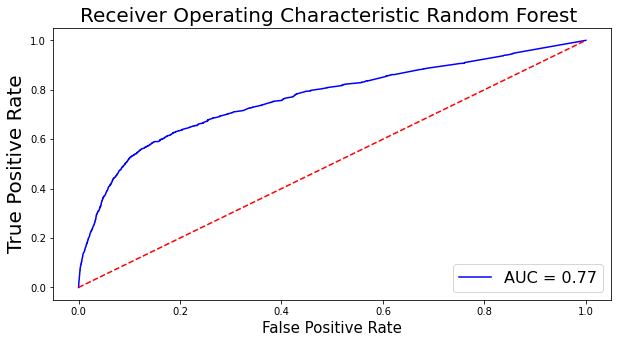

In [93]:
model_rfc_prob = model_rfc.predict_proba(X_test)
model_rfc_pred = model_rfc_prob[:,1]

model_rfc_fpr, model_rfc_tpr, model_rfc_threshold = metrics.roc_curve(y_test, model_rfc_pred)
model_rfc_roc_auc = metrics.auc(model_rfc_fpr, model_rfc_tpr)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,5))

ax.plot(model_rfc_fpr, model_rfc_tpr, 'b', label = 'AUC = %0.2f' % model_rfc_roc_auc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

## XGBoost

In [94]:
from xgboost import XGBClassifier
# supresses warming messages
warnings.filterwarnings('ignore')

model_xgb = XGBClassifier(use_label_encoder=False)
model_xgb.fit(X_train, y_train)

model_xgb_pred = model_xgb.predict(X_test)

print(confusion_matrix(y_test, model_xgb_pred ))
print(round(accuracy_score(y_test, model_xgb_pred),2)*100)

cv_xgb = (cross_val_score(estimator = model_xgb, X = X_train, y = y_train, cv = 10).mean())

[21:43:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

[[11804   276]
 [ 1088   421]]
90.0
[21:43:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:43:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:43:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:43:32] WARNING: C:/Users/Admin

Text(0.5, 1.0, 'Receiver Operating Characteristic XGBoost ')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

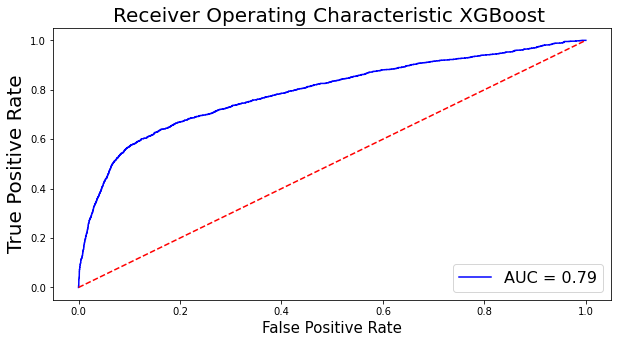

In [95]:
model_xgb_prob = model_xgb.predict_proba(X_test)
model_xgb_pred = model_xgb_prob[:,1]

model_xgb_fpr, model_xgb_tpr, model_xgb_threshold = metrics.roc_curve(y_test, model_xgb_pred)
model_xgb_roc_auc = metrics.auc(model_xgb_fpr, model_xgb_tpr)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,5))

ax.plot(model_xgb_fpr, model_xgb_tpr, 'b', label = 'AUC = %0.2f' % model_xgb_roc_auc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic XGBoost ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

Text(0.5, 1.0, 'Receiver Operating Comparison ')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

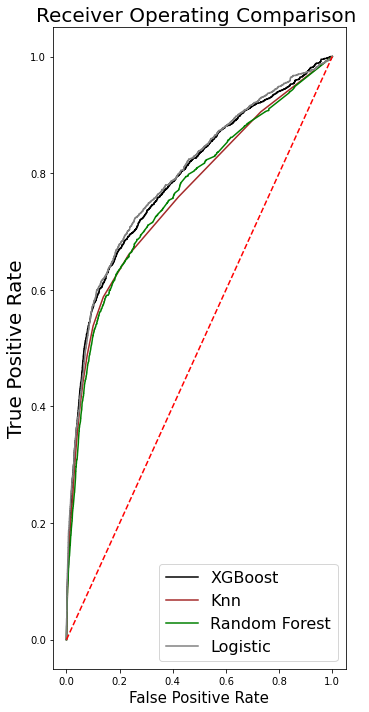

In [102]:
#ALL PLOTS ----------------------------------
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5,10))

ax.plot(model_xgb_fpr, model_xgb_tpr, 'b', label = 'XGBoost', color='black')
ax.plot(model_knn_fpr, model_knn_tpr, 'b', label = 'Knn', color='brown')
ax.plot(model_rfc_fpr, model_rfc_tpr, 'b', label = 'Random Forest', color='green')
ax.plot(model_logreg_fpr, model_logreg_tpr, 'b', label = 'Logistic', color='grey')
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Comparison ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

## Evaluation

In [96]:
eval_models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'K-Near Neighbors', 'Logistic Model', 'XGBoost'],
                'Accuracy Score':  [cv_rfc, cv_knn, cv_logreg, cv_xgb],
                'AUC Score': [model_rfc_roc_auc, model_knn_roc_auc, model_logreg_roc_auc, model_xgb_roc_auc]})

eval_models.sort_values(by='AUC Score', ascending=False)

,Models,Accuracy Score,AUC Score
2,Logistic Model,0.899228,0.795239
3,XGBoost,0.896944,0.790902
0,Random Forest Classifier,0.888607,0.765049
1,K-Near Neighbors,0.894987,0.764472
